In [1978]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1979]:
df = pd.read_csv(r'D:\Programming\AI\Jadi\Practice\Tehran_House_Prices\housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [1980]:
df['Address'] = pd.factorize(df['Address'])[0]        
df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
df = df[df['Area'] < 1000]
df.tail()

C:\Users\Amin\AppData\Local\Temp\ipykernel_13316\2835261321.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86.0,2,1,1,1,16,3.500000e+09,116666.67
3475,83.0,2,1,1,1,78,6.800000e+09,226666.67
3476,75.0,2,0,0,0,27,3.650000e+08,12166.67
3477,105.0,2,1,1,1,46,5.600000e+09,186666.67
3478,82.0,2,0,1,1,27,3.600000e+08,12000.00


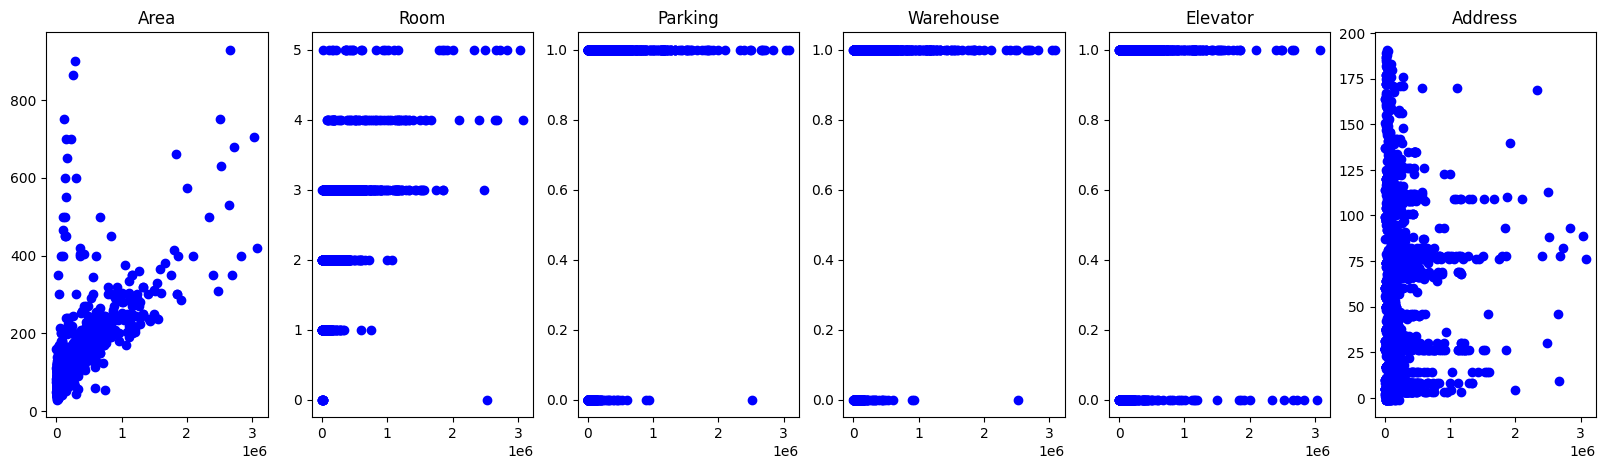

In [1981]:
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

axes[0].scatter(df['Price(USD)'], df['Area'], color='blue')
axes[0].set_title('Area')

axes[1].scatter(df['Price(USD)'], df['Room'], color='blue')
axes[1].set_title('Room')

axes[2].scatter(df['Price(USD)'], df['Parking'], color='blue')
axes[2].set_title('Parking')

axes[3].scatter(df['Price(USD)'], df['Warehouse'], color='blue')
axes[3].set_title('Warehouse')

axes[4].scatter(df['Price(USD)'], df['Elevator'], color='blue')
axes[4].set_title('Elevator')

axes[5].scatter(df['Price(USD)'], df['Address'], color='blue')
axes[5].set_title('Address')

plt.show()

In [1982]:
x1 = np.asanyarray(df['Area'])
x2 = np.asanyarray(df['Room'])
x3 = np.asanyarray(df['Parking'])
x4 = np.asanyarray(df['Warehouse'])
x5 = np.asanyarray(df['Elevator'])
x6 = np.asanyarray(df['Address'])
y = np.asanyarray(df['Price(USD)'])

In [1983]:
msk = np.random.rand(len(x1)) < 0.8
x1d = x1[msk]
x1t = x1[~msk]
x2d = x2[msk]
x2t = x2[~msk]
x3d = x3[msk]
x3t = x3[~msk]
x4d = x4[msk]
x4t = x4[~msk]
x5d = x5[msk]
x5t = x5[~msk]
x6d = x6[msk]
x6t = x6[~msk]
yd = y[msk]
yt = y[~msk]
X = np.vstack((x1d, x2d, x3d, x4d, x5d, x6d))
Xt = np.vstack((x1t, x2t, x3t, x4t, x5t, x6t))

In [ ]:
def sigmoid(X, b1, b2, b3, b4, b5, b6, b7, i):
    x1, x2, x3, x4, x5, x6 = X
    y = x1*b1 + x2*x2*b2 + x3*b3 + x4*b4 + x5*b5 + x6*x6*b6 + x1*x2*b7 + i
    return y

In [1985]:
from scipy.optimize import curve_fit

initial_guess = [1, 1, 1, 1, 1, 1, 1, 1, 1]
popt, pcov = curve_fit(sigmoid, X, yd, p0=initial_guess)

print(popt)

[ 8.59001100e+02  4.34887408e+03 -6.75619489e+03  3.75522258e+04
  5.84298503e+04  7.41013337e-01  4.22904137e+02  1.00000000e+00
 -1.20681047e+05]


C:\Users\Amin\AppData\Local\Temp\ipykernel_13316\73697804.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(sigmoid, X, yd, p0=initial_guess)


In [ ]:
y_pred = sigmoid(X, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7])
y_pred_t = sigmoid(Xt, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7])

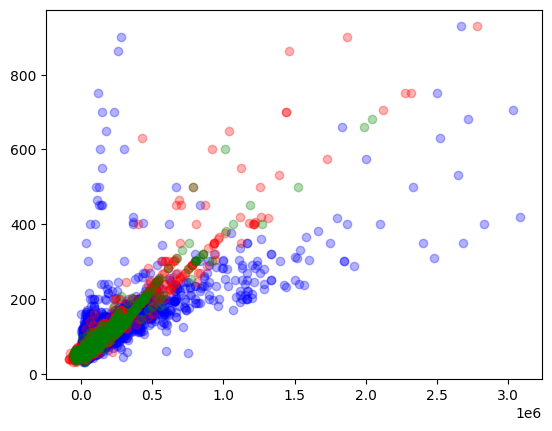

In [1987]:
plt.scatter(y, x1, color='blue', alpha=0.3)
plt.scatter(y_pred, X[0], color='red', alpha=0.3)
plt.scatter(y_pred_t, Xt[0], color='green', alpha=0.3)
plt.show()

In [1988]:
from sklearn.metrics import r2_score

score = r2_score(yt, y_pred_t)
print(score)

0.7186905469158471
